# An exploration of internal ribosome entry sites (IRES) in single-stranded RNA (ssRNA) viruses

### Sarah Johnson and Nicholas Forino - BIOL 419

Our investigations will focus on understanding how IRESs are distributed across virus families, identifying which virus genomes are the most IRES-rich, contain the most "potent" IRESs.

In [1]:
# preliminaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
# loading the data

# this is the table that contains IRES activity for the ssRNA coding sequences (CDS) by oligo index
data = pd.read_excel('aad4939_Table_S8.xlsx', skip_footer = 277, skiprows = np.arange(1, 378), header = 0)

print('Our data has shape:', data.shape)
data

Our data has shape: (6112, 9)


,Oligo_Index,Accession,Virus_name,Virus_class,ORF_start,ORF_end,Oligo_start_position,eGFP_expression (a.u),Oligo_sequence
0,29583,NC_001430,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,1,206.29,CTAGGGCGCGCCAGTCCTGGTGTTTCGCTCTGGGGTTGTTCCCACC...
1,13793,NC_001430,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,175,1838.30,CTAGGGCGCGCCAGTCCTTCTGTTTCCCCGGTGAAGTTGCATAGAC...
2,13794,NC_001430,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,349,206.29,CTAGGGCGCGCCAGTCCTGACGTGGTCCAGGCTGCGTTGGCGGCCT...
3,29737,NC_001430,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,523,206.29,CTAGGGCGCGCCAGTCCTCGCAGAATGTGGCGGAACCGACTACTTT...
4,13795,NC_001430,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,697,206.29,CTAGGGCGCGCCAGTCCTCTTTCTCTTGAATAATTGAGACAACTCA...
5,13796,NC_001430,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,871,206.29,CTAGGGCGCGCCAGTCCTGACCCATCCAAGTTCACAGAGCCTGTAG...
6,13797,NC_001430,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,1045,206.29,CTAGGGCGCGCCAGTCCTTGGCCCACCTATCTACCTGATAATGAGG...
7,13798,NC_001430,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,1219,206.29,CTAGGGCGCGCCAGTCCTGTCCAATACCACTACCTGTATAGGAGTG...
8,13799,NC_001430,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,1393,206.29,CTAGGGCGCGCCAGTCCTGTATTTGAACAACCCTACCTTTTAGATG...
9,13800,NC_001430,Enterovirus_D,"ssRNApositive_strandviruses,noDNAstage;Picorna...",727,7311,1567,206.29,CTAGGGCGCGCCAGTCCTATTCCGGTATGTCCATTGGCAGGAGGTA...


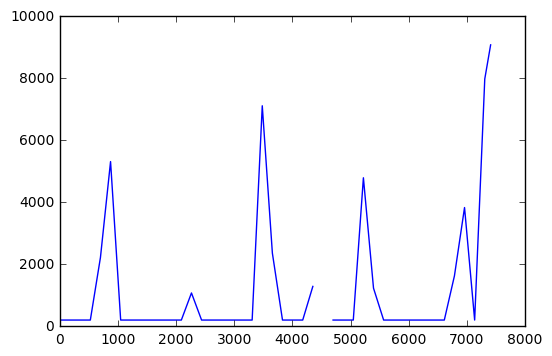

In [68]:
############ start of sarah's work ##############

# test with one virus 
swine = data[data['Accession '].str.contains('NC_018668')]
plt.plot(swine.loc[:, 'Oligo_start_position'], swine.loc[:, 'eGFP_expression (a.u)'])


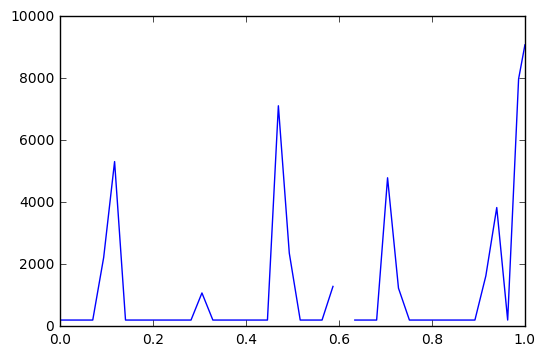

In [4]:
# test with one virus
swine_position = np.zeros(swine.shape[0])
swine.shape[0]
swine_array = swine.values
for j in np.arange(swine.shape[0]):
   swine_position[j] = swine_array[j, 6]/swine_array[-1, 6]
swine_position
plt.plot(swine_position, swine.loc[:, 'eGFP_expression (a.u)'])


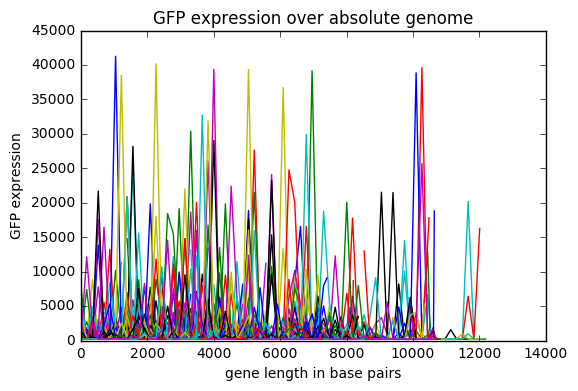

In [5]:
# plot expression levels across the total length of the genome
viruses = np.unique(data.ix[:, 1])

for i in viruses:
    expression = data[data['Accession '].str.contains(i)]
        
    plt.plot(expression.loc[:, 'Oligo_start_position'], expression.loc[:, 'eGFP_expression (a.u)'])
    plt.title('GFP expression over absolute genome')
    plt.ylabel('GFP expression')
    plt.xlabel('gene length in base pairs')

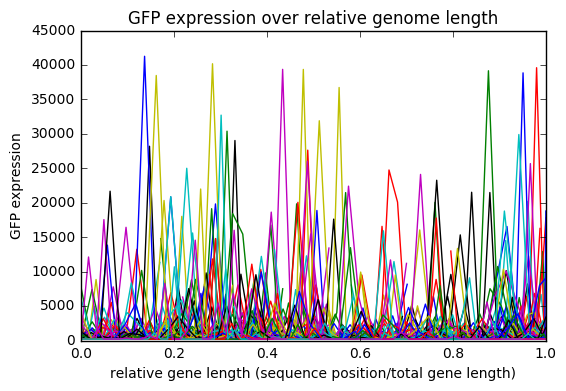

In [6]:
# plot relative expression levels across the length of the genome

for i in viruses:
    expression = data[data['Accession '].str.contains(i)]
    
    position = np.zeros(expression.shape[0])
    expression_array = expression.values
    
    for j in np.arange(expression.shape[0]):
        position[j] = expression_array[j, 6]/expression_array[-1, 6]
        
    plt.plot(position, expression.loc[:, 'eGFP_expression (a.u)'])
    plt.title('GFP expression over relative genome length')
    plt.ylabel('GFP expression')
    plt.xlabel('relative gene length (sequence position/total gene length)')


data_acc_index = pd.read_excel('aad4939_Table_S8.xlsx', skip_footer = 277, 
                               skiprows = np.arange(1, 378), header = 0, index_col = 1)
data_acc_index

data_acc_index.ix['NC_001430']

In [69]:
########### end of sarah's work ##############

In [70]:
# create an array of the virus class for each accession number

virus_class = np.zeros(viruses.size)
for index in range(viruses.size): 
    expression = data[data['Accession '].str.contains(viruses[index])]
    if 'Picorna' in expression.iloc[0]['Virus_class']:
        virus_class[index] = 1
    elif 'Flavi' in expression.iloc[0]['Virus_class']:
        virus_class[index] = 2
virus_class

## 1 = picornavirus, 2 = flavivirus

array([ 1.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,  2.,  1.,  1.,  2.,  2.,
        2.,  2.,  2.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,  2.,  2.,  1.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  1.,  2.,  2.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  2.,
        2.,  1.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  2.,  2.,  2.,  2.,
        2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  2.,  2.,  2.,  1.,  1.,  1.,  2.,  2.,  2.,  2.])

In [143]:
## find maximum expression for each IRES

max_expression = np.zeros(viruses.size)
max_expression_location = np.zeros(viruses.size)
for index in range(viruses.size):
    expression = data[data['Accession '].str.contains(viruses[index])]

    max_expression[index] = np.max(expression['eGFP_expression (a.u)'])
    # print(expression['Oligo_start_position'][expression.loc[expression['eGFP_expression (a.u)'].idxmax]])


12
13803                                                                                                                                                                                                                  NaN
NC_001430                                                                                                                                                                                                              NaN
Enterovirus_D                                                                                                                                                                                                          NaN
ssRNApositive_strandviruses,noDNAstage;Picornavirales;Picornaviridae;Enterovirus.                                                                                                                                      NaN
727                                                                                                                      

In [142]:
max_expression = np.zeros(viruses.size)
max_expression_location = np.zeros(viruses.size)
for index in range(viruses.size):
    expression = data[data['Accession '].str.contains(viruses[index])]
      
    expression_array = expression.values
    for np.max(expression_array[:, 7]) in expression_array[:, 7]:
        
        max_expression_location[index] = np.max(expression_array[:, 7])
max_expression

SyntaxError: can't assign to function call (<ipython-input-142-de3cd927921b>, line 7)

In [123]:
print(pig['Oligo_start_position'][pig.loc[pig['eGFP_expression (a.u)'].idxmax]])

5852
25435                                                                                                                                                                                                                  NaN
NC_018668                                                                                                                                                                                                              NaN
Bovine_hungarovirus                                                                                                                                                                                                    NaN
ssRNApositive_strandviruses,noDNAstage;Picornavirales;Picornaviridae.                                                                                                                                                  NaN
733                                                                                                                    